In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
G = nx.read_edgelist('../data/Cit-HepPh.txt', create_using=nx.DiGraph)

# Graph properties

In [3]:
print('number of nodes', nx.number_of_nodes(G))
print('number of edges', nx.number_of_edges(G))
print('number of selfloops', nx.number_of_selfloops(G))
print('number of weakly connected components', nx.number_weakly_connected_components(G))
print('number of strongly connected components', nx.number_strongly_connected_components(G))
print('average clustering coefficient', nx.average_clustering(G))
print('number of weak triangles', sum(nx.triangles(G.to_undirected()).values())/3)
print('fraction of closed triads', nx.transitivity(G))
print('density of graph', nx.density(G))

number of nodes 34546
number of edges 421578
number of selfloops 44
number of weakly connected components 61
number of strongly connected components 21608
average clustering coefficient 0.14326383421252617
number of weak triangles 1276868.0
fraction of closed triads 0.10118914905026928
density of graph 0.00035326041393102855


# Degree distribution

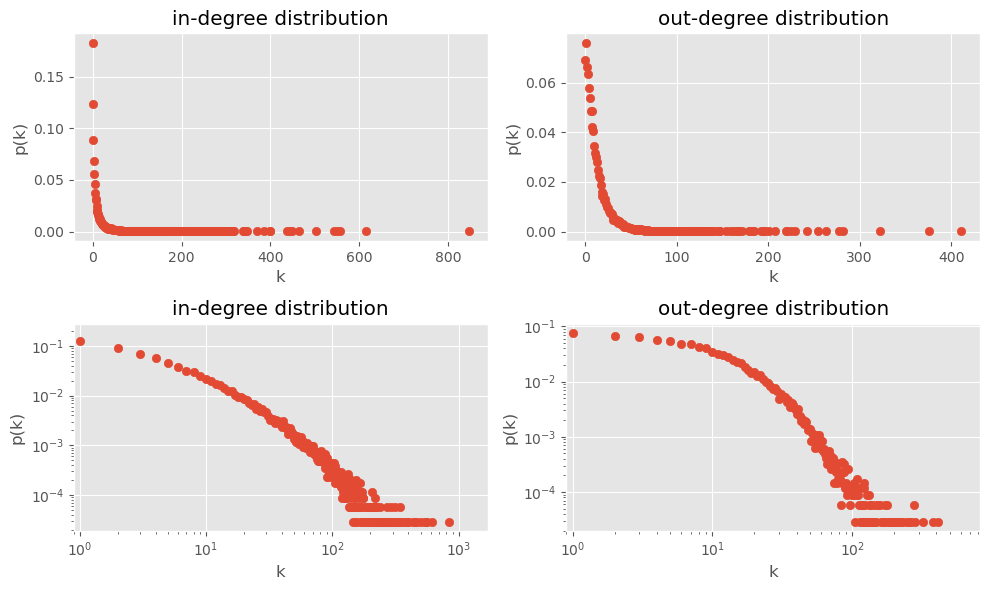

In [10]:
# get list of in- and out-degrees
in_degrees = np.array(list(dict(G.in_degree).values()))
out_degrees = np.array(list(dict(G.out_degree).values()))

# get frequency of each degree and normalize to density
d_in, v_in = np.unique(in_degrees, return_counts=True)
v_in = v_in / v_in.sum()
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()

# setup figure for plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,6))

# plot in-degree
ax1.scatter(d_in, v_in)
ax1.set_xlabel('k')
ax1.set_ylabel('p(k)')
ax1.set_title('in-degree distribution')

# plot in-degree log-log
ax3.scatter(d_in, v_in)
ax3.set_xlabel('k')
ax3.set_ylabel('p(k)')
ax3.set_title('in-degree distribution')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(0.9, np.max(d_in)*2)

# plot out-degree
ax2.scatter(d_out, v_out)
ax2.set_xlabel('k')
ax2.set_ylabel('p(k)')
ax2.set_title('out-degree distribution')

# plot out-degree log-log
d_out, v_out = np.unique(out_degrees, return_counts=True)
v_out = v_out / v_out.sum()
ax4.scatter(d_out, v_out)
ax4.set_xlabel('k')
ax4.set_ylabel('p(k)')
ax4.set_title('out-degree distribution')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlim(0.9, np.max(d_out)*2)

plt.tight_layout()

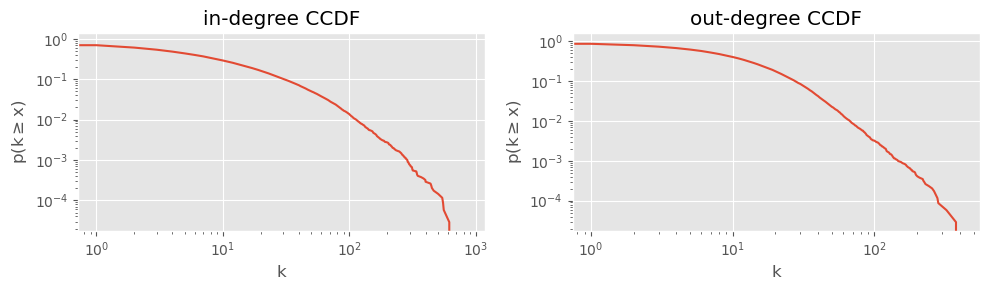

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

# get complementray cumulative sum of degrees
v_in_cum = 1 - np.cumsum(v_in)
v_out_cum = 1 - np.cumsum(v_out)

# plot in-degree CCDF log-log
ax1.plot(d_in, v_in_cum)
ax1.set_title('in-degree CCDF')
ax1.set_xlabel('k')
ax1.set_ylabel('p(k$\geq$x)')
ax1.set_xscale('log')
ax1.set_yscale('log')

# plot out-degree CCDF log-log
ax2.plot(d_out, v_out_cum)
ax2.set_title('out-degree CCDF')
ax2.set_xlabel('k')
ax2.set_ylabel('p(k$\geq$x)')
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.tight_layout()

Text(0, 0.5, 'out-degree')

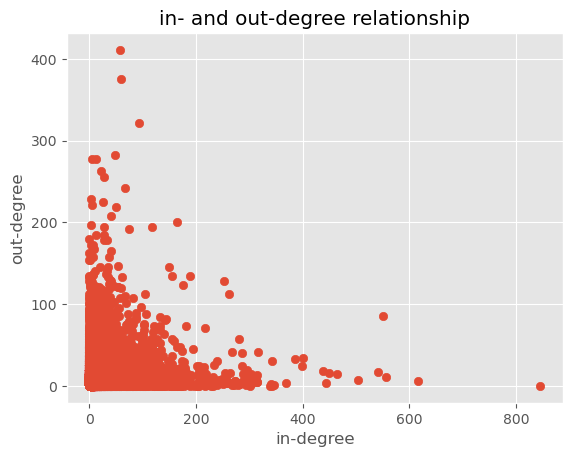

In [6]:
fig, ax = plt.subplots()
ax.scatter(in_degrees, out_degrees)
ax.set_title('in- and out-degree relationship')
ax.set_xlabel('in-degree')
ax.set_ylabel('out-degree')

# Relevant distributions

In [ ]:
# clustering coefficient
clustering = nx.clustering(G)

fig, ax = plt.subplots()
sns.histplot(list(clustering.values()), stat='probability', ax=ax)
ax.set_title('Clustering Coefficient Distribution')
ax.set_xlabel('Clustering Coefficient')
ax.set_ylabel('Frequency')

In [ ]:
# betweenness centrality
betweeness = nx.betweenness_centrality(G, k=1000)

fig, ax = plt.subplots()
sns.histplot(list(betweeness.values()), stat='probability', ax=ax)
ax.set_title('Betweeness Centrality Distribution')
ax.set_xlabel('Betweeness Centrality')
ax.set_ylabel('Frequency')

print('average betweeness centrality', np.mean(list(betweeness.values())))

In [ ]:
# closeness centrality
closeness = nx.closeness_centrality(G)

fig, ax = plt.subplots()
sns.histplot(list(closeness.values()), stat='probability', ax=ax)
ax.set_title('Closeness Centrality Distribution')
ax.set_xlabel('Closeness Centrality')
ax.set_ylabel('Frequency')

print('average closeness centrality', np.mean(list(closeness.values())))

In [ ]:
# pagerank
pagerank = nx.pagerank(G)

fig, ax = plt.subplots()
sns.histplot(list(pagerank.values()), stat='probability', ax=ax)
ax.set_title('Pagerank Distribution')
ax.set_xlabel('Pagerank')
ax.set_ylabel('Frequency')

print('average pagerank', np.mean(list(pagerank.values())))

In [ ]:
# # eigenvector centrality
# eigenvector = nx.eigenvector_centrality(G)

# fig, ax = plt.subplots()
# sns.histplot(list(eigenvector.values()), stat='probability', ax=ax)
# ax.set_title('Eigenvector Centrality Distribution')
# ax.set_xlabel('Eigenvector Centrality')
# ax.set_ylabel('Frequency')

# print('average eigenvector centrality', np.mean(list(eigenvector.values())))

# Cliques

# Community detection
NOTE: Read up on modularity

In [ ]:
# communities = list(nx.community.girvan_newman(G))
communities = list(nx.community.greedy_modularity_communities(G))

In [ ]:
for node in G.nodes():
    for i, c in enumerate(communities):
        if node in c:
            G.nodes[node]['community'] = i

# Graph summarization

In [ ]:
# do graph aggregation based on communities

# Network visualization

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
node_color = [G.nodes[node]['community'] for node in G.nodes()]
node_size = 15
nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, alpha=.7, node_size=node_size, ax=ax)
nx.draw_networkx_edges(G, pos=pos, arrowsize=5, node_size=node_size, alpha=0.05, ax=ax);

# Connected component analysis

In [ ]:
wcc_components = np.array(list(nx.weakly_connected_components(G)))
wcc_component_sizes = np.array([len(c) for c in wcc_components])
wcc_idx = np.argsort(wcc_component_sizes)[::-1]
wcc_components = wcc_components[wcc_idx]
wcc_component_sizes = wcc_component_sizes[wcc_idx]

scc_components = np.array(list(nx.strongly_connected_components(G)))
scc_component_sizes = np.array([len(c) for c in scc_components])
scc_idx = np.argsort(scc_component_sizes)[::-1]
scc_components = scc_components[scc_idx]
scc_component_sizes = scc_component_sizes[scc_idx]

In [ ]:
print('largest weakly connected component size', wcc_component_sizes[0])
print('second largest weakly connected component size', wcc_component_sizes[1])
print('largest strongly connected component size', scc_component_sizes[0])
print('second largest strongly connected component size', scc_component_sizes[1])

G_wcc = G.subgraph(wcc_components[0])
G_scc = G.subgraph(scc_components[0])